In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('master_tickets.csv')
df.head()

,fiscal_year,acct_id,is_college_pass,event_name,event_date,add_datetime,days_before_event,section_name,row_name,seat_num,...,marital_status,education,zip,Weekend,Series,Name,Type,month,month_name,season_period
0,FY23,8362049,False,230922SE,2022-09-22,2022-07-15,69.0,BALCL,A,4,...,Single,NaN,30041,CS1,1,Opening Weekend,Classical,7.0,July,Off-Season
1,FY23,8449640,False,230922SE,2022-09-22,2022-09-14,8.0,BALCL,B,1,...,Married,Graduate School,30316,CS1,1,Opening Weekend,Classical,9.0,September,Opening
2,FY23,4061365,False,230922SE,2022-09-22,2022-07-27,57.0,BALCL,B,4,...,Single,College,30308,CS1,1,Opening Weekend,Classical,7.0,July,Off-Season
3,FY23,354115,False,230922SE,2022-09-22,2022-04-05,170.0,BALCL,C,1,...,Married,College,30087,CS1,1,Opening Weekend,Classical,4.0,April,Peak
4,FY23,8908470,False,230922SE,2022-09-22,2022-09-20,2.0,BALCL,C,3,...,Inferred Single,High School,30253,CS1,1,Opening Weekend,Classical,9.0,September,Opening


In [3]:
# for first year subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
filtered1 = df23[df23['price_code_type'].str.startswith('Fixed Freshman Subscription', na=False)]
freshman23 = np.sum(filtered1.groupby('price_code_type')['ticket_type'].count())
print('Freshman Subscribers in FY23: ' + str(freshman23))

# for second year subscribers in FY24 - to compare with first year subscribers in FY23
df24 = df[df['fiscal_year'] =='FY24']
filtered2 = df24[df24['price_code_type'].str.startswith('Fixed Sophomore Subscription', na=False)]
sophomore24 = np.sum(filtered2.groupby('price_code_type')['ticket_type'].count())
print('Sophomore Subscribers in FY24: ' + str(sophomore24))

print('Rate of coming back from Freshman in FY23 to Sophomore in FY24: ' + str(sophomore24 / freshman23 * 100))

Freshman Subscribers in FY23: 2300
Sophomore Subscribers in FY24: 1024
Rate of coming back from Freshman in FY23 to Sophomore in FY24: 44.52173913043478


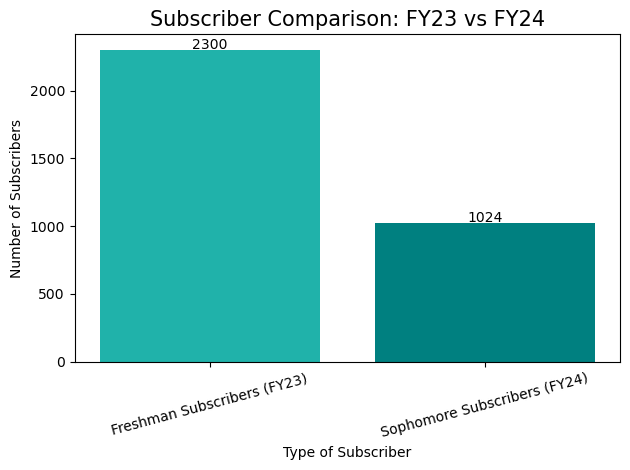

In [4]:
# Data
labels = ['Freshman Subscribers (FY23)', 'Sophomore Subscribers (FY24)']
values = [freshman23, sophomore24]

# Plot
plt.bar(labels, values, color=['lightseagreen', 'teal'])
plt.title('Subscriber Comparison: FY23 vs FY24', fontsize = 15)
plt.xlabel('Type of Subscriber')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=15)

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=10)

plt.tight_layout()
plt.show()

In [5]:
# for 2 year subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
filtered3 = df23[df23['price_code_type'].str.startswith('Fixed Sophomore Subscription', na=False)]
sophomore23 = np.sum(filtered3.groupby('price_code_type')['ticket_type'].count())
sophomore23

1015

In [6]:
filtered3['acct_id']

1        8449640
13       4721140
14       7603871
16        100532
17        100532
          ...   
28525    7648541
28545     120156
28546    7097717
28588    7595688
28590    7011083
Name: acct_id, Length: 1015, dtype: int64

In [7]:
# for three+ year subscribers in FY24 - to compare with second year subscribers in FY23
# I'm not sure if you can compare with just second year subscribers, since it's 3+ years but
df24 = df[df['fiscal_year'] =='FY24']
filtered4 = df24[df24['price_code_type'].str.startswith('Fixed Established Subscription', na=False)]
established24 = np.sum(filtered4.groupby('price_code_type')['ticket_type'].count())
established24 #8410 established subscribers in FY24

count_match = filtered4['acct_id'].isin(filtered3['acct_id']).sum()
print(count_match)

644


In [8]:
# All of the sophomore subscribers in 2023 who are now established subscribers in 2024
estabfromsoph24 = filtered4[filtered4['acct_id'].isin(filtered3['acct_id'])]
estabfromsoph24

,fiscal_year,acct_id,is_college_pass,event_name,event_date,add_datetime,days_before_event,section_name,row_name,seat_num,...,marital_status,education,zip,Weekend,Series,Name,Type,month,month_name,season_period
32472,FY24,157798,False,241005SE,2023-10-05,2023-03-21,198.0,ORCHL,S,15,...,Married,Graduate School,30305,CS1,1,Opening Weekend,Classical,3.0,March,Peak
32473,FY24,157798,False,241005SE,2023-10-05,2023-03-21,198.0,ORCHL,S,17,...,Married,Graduate School,30305,CS1,1,Opening Weekend,Classical,3.0,March,Peak
32480,FY24,135402,False,241007SE,2023-10-07,2023-03-27,194.0,LOGEL,B,4,...,Married,Graduate School,30340,CS1,1,Opening Weekend,Classical,3.0,March,Peak
32542,FY24,390349,False,241021SE,2023-10-21,2023-09-12,39.0,ORCHL,V,19,...,Single,Graduate School,30329,CS2,3,Prokofiev Romeo & Juilet,Classical,9.0,September,Opening
32551,FY24,2621185,False,241102SE,2023-11-02,2023-05-02,184.0,ORCHR,F,18,...,Married,Graduate School,30309,CS3,2,Stutzmann + Brahms Songs,Classical,5.0,May,Peak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51643,FY24,178566,False,240613SE,2024-06-13,2023-04-21,419.0,DRESSL,K,20,...,Married,College,30092,CS24,4,Beethoven Violin Concerto,Classical,4.0,April,Peak
51667,FY24,238626,False,240613SE,2024-06-13,2023-03-29,442.0,ORCHL,R,1,...,Married,High School,30319-1322,CS24,4,Beethoven Violin Concerto,Classical,3.0,March,Peak
51685,FY24,7603319,False,240613SE,2024-06-13,2023-07-27,322.0,ORCHR,N,13,...,Married,College,10471,CS24,4,Beethoven Violin Concerto,Classical,7.0,July,Off-Season
51725,FY24,7675625,False,240615SE,2024-06-15,2023-06-06,375.0,DRESSL,K,1,...,Married,High School,30342,CS24,4,Beethoven Violin Concerto,Classical,6.0,June,Finale


In [9]:
estabfromsoph24['age'].describe()

count    619.000000
mean      63.672052
std       15.207541
min       24.000000
25%       54.000000
50%       64.000000
75%       76.000000
max       99.000000
Name: age, dtype: float64

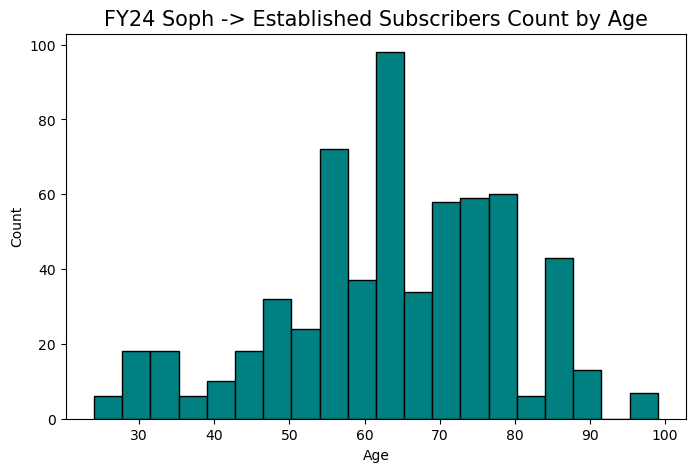

In [10]:
plt.figure(figsize=(8,5))
plt.hist(estabfromsoph24['age'].dropna(), bins=20, color = 'teal', edgecolor='black')
plt.title('FY24 Soph -> Established Subscribers Count by Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

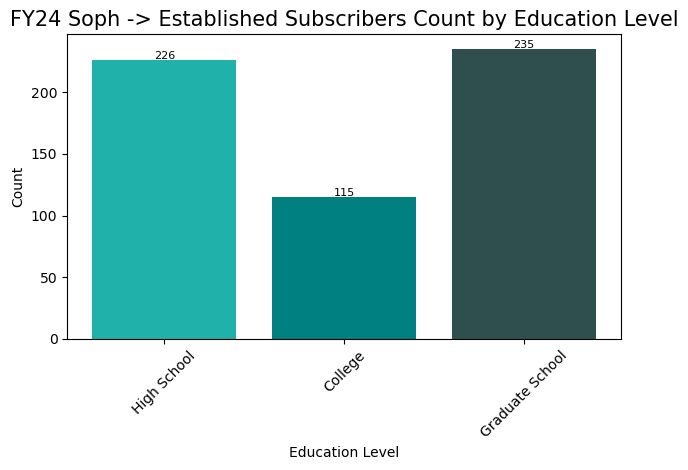

In [11]:
edu_counts = estabfromsoph24.groupby('education')['ticket_type'].count()

order = ['High School', 'College', 'Graduate School']
edu_counts = edu_counts.reindex(order)

plt.bar(edu_counts.index, edu_counts.values, color=['lightseagreen', 'teal', 'darkslategray'])
plt.title('FY24 Soph -> Established Subscribers Count by Education Level', fontsize = 15)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(edu_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='baseline', fontsize=8)

plt.tight_layout()
plt.show()

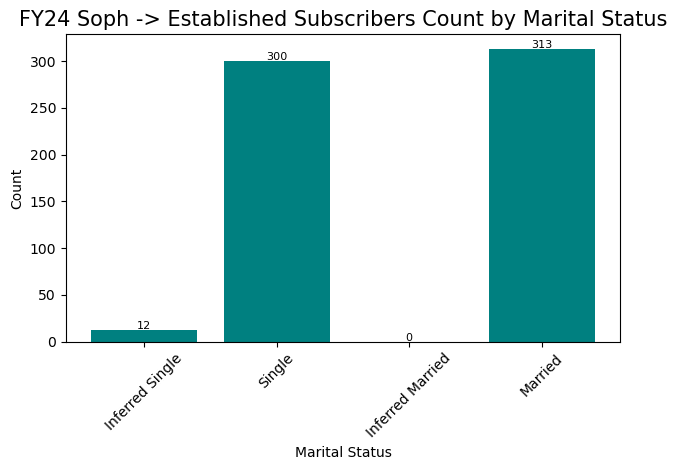

In [12]:
marital_counts = estabfromsoph24.groupby('marital_status')['ticket_type'].count()

order = ['Inferred Single', 'Single', 'Inferred Married', 'Married']
marital_counts = marital_counts.reindex(order, fill_value = 0)

plt.bar(marital_counts.index, marital_counts.values, color='teal')
plt.title('FY24 Soph -> Established Subscribers Count by Marital Status', fontsize = 15)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(marital_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()

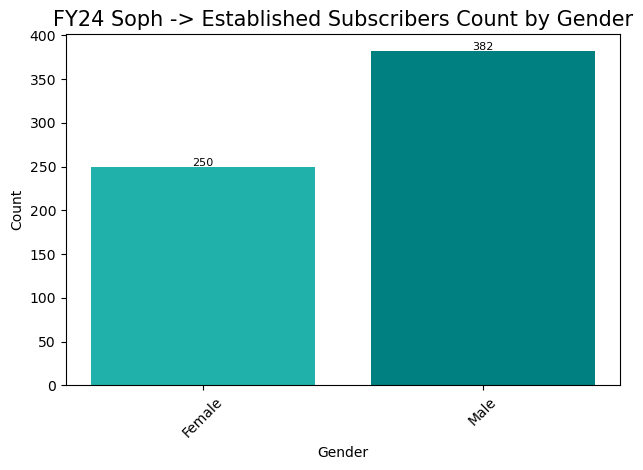

In [13]:
gender_counts = estabfromsoph24.groupby('gender')['ticket_type'].count()

plt.bar(gender_counts.index, gender_counts.values, color=['lightseagreen', 'teal'])
plt.title('FY24 Soph -> Established Subscribers Count by Gender', fontsize = 15)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 1, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()

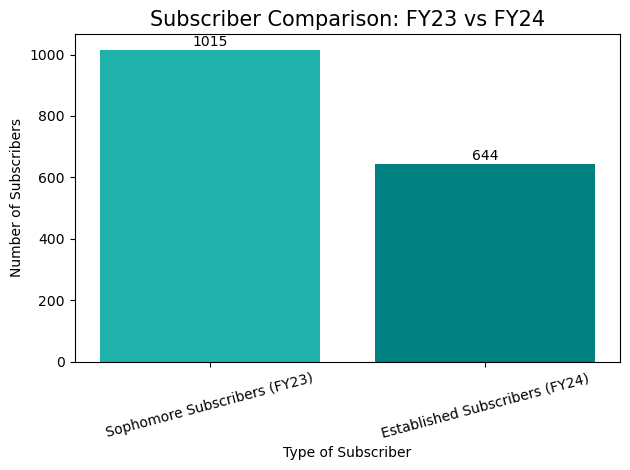

In [14]:
# Data
labels = ['Sophomore Subscribers (FY23)', 'Established Subscribers (FY24)']
values = [sophomore23, count_match]

# Plot
plt.bar(labels, values, color=['lightseagreen', 'teal'])
plt.title('Subscriber Comparison: FY23 vs FY24', fontsize = 15)
plt.xlabel('Type of Subscriber')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=15)

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.show()

In [15]:
# count of CYO subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
CYO23 = df23[df23['price_code_type'] == 'CYO Subscription']['ticket_type'].count()
print('CYO Subscribers in FY23: ' + str(CYO23))

# for upgraded subscribers in FY24 - to compare with CYO subscribers in FY23
df24 = df[df['fiscal_year'] =='FY24']
filtered = df24[df24['price_code_type'].str.startswith('Fixed Upgrade Subscription', na=False)]
upgrade24 = np.sum(filtered.groupby('price_code_type')['ticket_type'].count())
print('Upgraded subscriptions in FY24: ' + str(upgrade24))

print('Rate of coming back from CYO in FY23 to Upgraded in FY24: ' + str(upgrade24 / CYO23 * 100))

CYO Subscribers in FY23: 2537
Upgraded subscriptions in FY24: 446
Rate of coming back from CYO in FY23 to Upgraded in FY24: 17.57981868348443


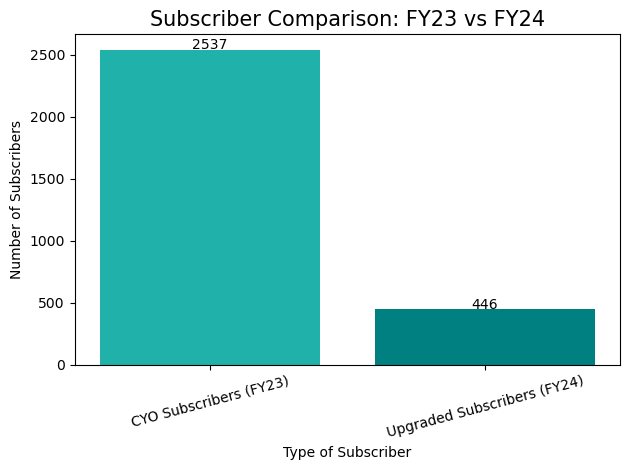

In [16]:
# Data
labels = ['CYO Subscribers (FY23)', 'Upgraded Subscribers (FY24)']
values = [CYO23, upgrade24]

# Plot
plt.bar(labels, values, color=['lightseagreen', 'teal'])
plt.title('Subscriber Comparison: FY23 vs FY24', fontsize = 15)
plt.xlabel('Type of Subscriber')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=15)

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=10)

plt.tight_layout()
plt.show()

In [59]:
CYO23_df = df23[df23['price_code_type'] == 'CYO Subscription']
CYO23_df['acct_id']
CYO23_df['price_code_type'].value_counts()

price_code_type
CYO Subscription    2537
Name: count, dtype: int64

In [74]:
#CYO24_patron = df24[df24['acct_id'].isin(CYO23_df['acct_id'])]
CYO23_filtered = df23[df23['price_code_type'] == 'CYO Subscription' ]
CYO24_filtered = df24[df24['price_code_type'] == 'CYO Subscription']
CYO24 = CYO24_filtered['ticket_type'].count()
display(CYO23_filtered['price_code_type'].value_counts())
CYO24_filtered['price_code_type'].value_counts()

price_code_type
CYO Subscription    2537
Name: count, dtype: int64

price_code_type
CYO Subscription    2844
Name: count, dtype: int64

In [64]:
# all the CYO account id's in 2023 found in 2024 
CYO24_patron = df24[df24['acct_id'].isin(CYO23_df['acct_id'])]

CYO24_filtered = CYO24_patron[CYO24_patron['price_code_type'] == 'CYO Subscription']
CYO24 = CYO24_filtered['ticket_type'].count()
display(CYO24)

display(CYO24_filtered['acct_id'])

display(CYO24_filtered['price_code_type'].value_counts()  )

1262

32448    6494286
32459     129561
32460     257546
32461     204922
32463    7243721
          ...   
51739     148448
51740    8654888
51771    1412777
51790    8654888
51793     273221
Name: acct_id, Length: 1262, dtype: int64

price_code_type
CYO Subscription    1262
Name: count, dtype: int64

In [71]:
#not_CYO = df24[~df24['acct_id'].isin(CYO24_patron['acct_id'] or filtered['acct_id'])]
not_CYO = df24[~df24['acct_id'].isin(CYO24_filtered['acct_id']) & ~df24['acct_id'].isin(filtered['acct_id'])]
not_CYO['price_code_type'].value_counts()

price_code_type
Single Ticket                                18185
Fixed Established Subscription 6 Concert      5345
CYO Subscription                              1582
Fixed Freshman Subscription 6 Concert         1300
Fixed Established Subscription 24 Concert     1238
Discounted CYO Subscription                    972
Fixed Established Subscription 12 Concert      817
Fixed Sophomore Subscription 6 Concert         654
Fixed Established Subscription Sunday          629
Fixed Established Subscription 18 Concert      346
Fixed Freshman Subscription Sunday             335
Fixed Freshman Subscription 24 Concert         289
Fixed Freshman Subscription 12 Concert         248
Fixed Sophomore  Subscription Sunday           217
Fixed Sophomore Subscription 24 Concert        214
Fixed Lapsed Subscription 6 Concert            102
Fixed Musician Subscription 24 Concert          64
Fixed Freshman Subscription 18 Concert          49
Fixed Sophomore Subscription 18 Concert         39
Fixed Chorus Su

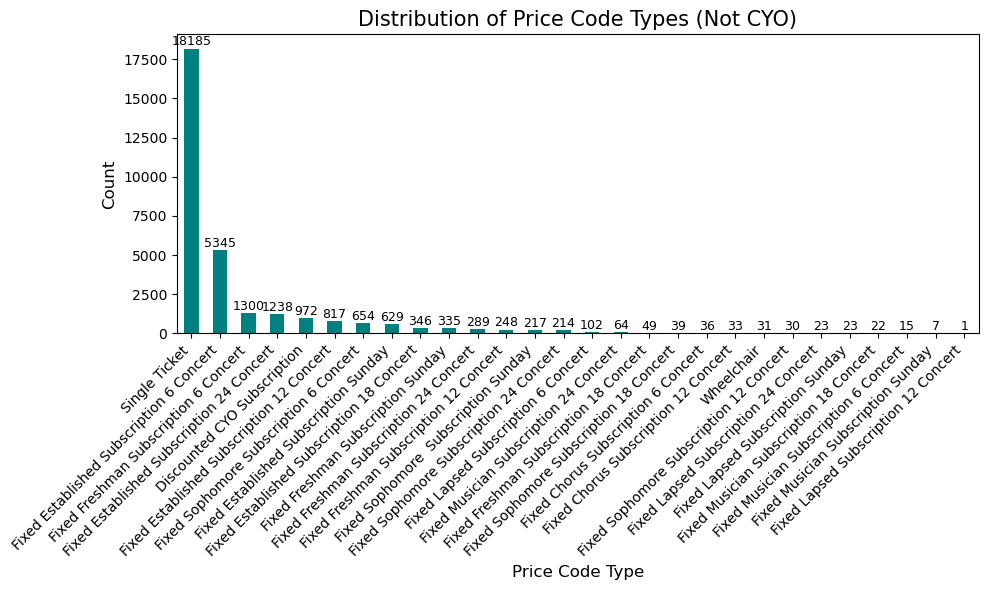

In [76]:
# Get the value counts for 'price_code_type'
price_code_counts = not_CYO['price_code_type'].value_counts()
price_code_counts = price_code_counts[price_code_counts.index != 'CYO Subscription']

# Plot the bar chart
plt.figure(figsize=(10, 6))
price_code_counts.plot(kind='bar', color='teal')

# Add titles and labels
plt.title('Distribution of Price Code Types (Not CYO)', fontsize=15)
plt.xlabel('Price Code Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on top of bars
for i, value in enumerate(price_code_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

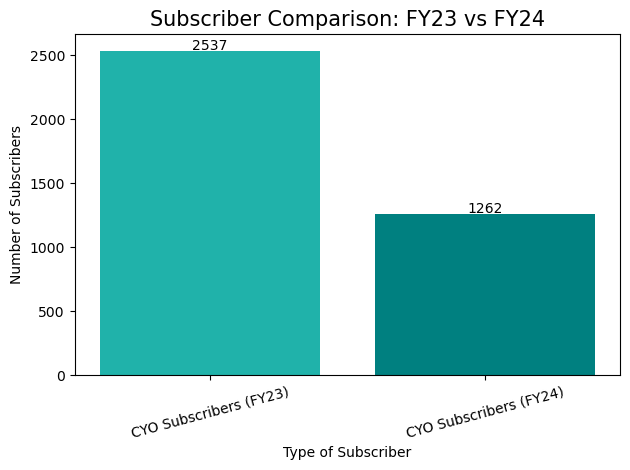

In [54]:
# Data
labels = ['CYO Subscribers (FY23)', 'CYO Subscribers (FY24)']
values = [CYO23, CYO24]

# Plot
plt.bar(labels, values, color=['lightseagreen', 'teal'])
plt.title('Subscriber Comparison: FY23 vs FY24', fontsize = 15)
plt.xlabel('Type of Subscriber')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=15)

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=10)

plt.tight_layout()
plt.show()

In [37]:
df2 = pd.read_csv('patron_summary.csv')
#display(df2['active_fy23'].value_counts())
patron_2023 = df2[(df2['active_fy23'] == True) & (df2['active_fy24'] == False)]
# ^^ for CYO subscribers only in 2023 and not 2024 
patron_2024 = df2[(df2['active_fy23'] == False) & (df2['active_fy24'] == True)]

In [38]:
CYO23_df = df23[df23['price_code_type'] == 'CYO Subscription']

In [39]:
CYO23_patron = df2[df2['acct_id'].isin(CYO23_df['acct_id'])]
CYO23_patron # this is the id's that were CYO in 2023 in patron_summary

,acct_id,is_college_pass,total_tickets,total_seats,unique_events,total_spent,avg_ticket_price,median_ticket_price,min_ticket_price,max_ticket_price,...,max_days_before_event,ticket_type_distribution,source_distribution,age_first,gender_first,marital_status_first,education_first,zip_first,ticket_type_fy23_<lambda>,ticket_type_fy24_<lambda>
2,100378,False,28,36,27,3590.0,128.214286,109.0,65.0,226.0,...,455.0,"{'Subscription': 20, 'Single Ticket': 8}",{'ASO Staff': 28},82.0,Female,Married,Graduate School,30309-3564,"{'Subscription': 10, 'Single Ticket': 4}","{'Subscription': 10, 'Single Ticket': 4}"
13,102622,False,9,9,9,721.0,80.111111,76.0,54.0,113.0,...,276.0,"{'Subscription': 7, 'Single Ticket': 2}",{'ASO Staff': 9},86.0,Male,Married,Graduate School,30327-4582,"{'Subscription': 3, 'Single Ticket': 1}","{'Subscription': 4, 'Single Ticket': 1}"
30,106087,False,30,55,24,6067.0,202.233333,205.0,75.0,636.0,...,454.0,"{'Subscription': 23, 'Single Ticket': 7}","{'ASO Staff': 29, 'onlin': 1}",80.0,Male,Married,High School,30309-3336,"{'Subscription': 12, 'Single Ticket': 2}","{'Subscription': 11, 'Single Ticket': 5}"
47,110091,False,13,30,13,2906.0,223.538462,218.0,130.0,300.0,...,392.0,"{'Subscription': 10, 'Single Ticket': 3}","{'ASO Staff': 7, 'online': 6}",86.0,Male,Married,Graduate School,30305,"{'Subscription': 6, 'Single Ticket': 2}","{'Subscription': 4, 'Single Ticket': 1}"
59,113237,False,34,68,34,3380.0,99.411765,86.0,80.0,204.0,...,454.0,"{'Subscription': 32, 'Single Ticket': 2}",{'ASO Staff': 34},84.0,Male,Married,College,30305,"{'Subscription': 16, 'Single Ticket': 1}","{'Subscription': 16, 'Single Ticket': 1}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947,9179258,False,8,18,7,1319.0,164.875000,148.0,120.0,267.0,...,16.0,"{'Single Ticket': 6, 'Subscription': 2}","{'online': 6, 'ASO Staff': 2}",56.0,Male,Married,High School,30309,"{'Single Ticket': 2, 'Subscription': 2}",{'Single Ticket': 4}
16136,9198770,True,4,4,2,54.0,13.500000,7.0,0.0,40.0,...,1.0,{'Subscription': 1},{'online': 4},20.0,Male,NaN,High School,30075,{'Subscription': 1},{}
16167,9201219,False,9,18,9,1720.0,191.111111,212.0,142.0,212.0,...,282.0,{'Subscription': 9},"{'onlin': 6, 'online': 3}",NaN,NaN,NaN,NaN,30307,{'Subscription': 3},{'Subscription': 6}
16713,9260610,False,1,1,1,45.0,45.000000,45.0,45.0,45.0,...,0.0,{'Subscription': 1},{'online': 1},NaN,NaN,NaN,NaN,30324,{'Subscription': 1},{}


In [45]:
# were all of the account ids in the master_tickets found in the patron summary?
CYO23_patron = patron_2023[patron_2023['acct_id'].isin(CYO23_df['acct_id'])]
#display(CYO23_patron.columns)

In [48]:
df[df['acct_id'] == 100378][['fiscal_year', 'price_code_type']]

,fiscal_year,price_code_type
289,FY23,CYO Subscription
1454,FY23,CYO Subscription
1508,FY23,CYO Subscription
3600,FY23,CYO Subscription
4391,FY23,CYO Subscription
5129,FY23,Single Ticket
6353,FY23,CYO Subscription
8620,FY23,CYO Subscription
10732,FY23,Single Ticket
12588,FY23,CYO Subscription


In [20]:
CYO23_patron['total_spent'].describe()

count      136.000000
mean       717.427721
std       2003.798400
min         22.000000
25%        247.500000
50%        429.250000
75%        685.000000
max      23157.000000
Name: total_spent, dtype: float64

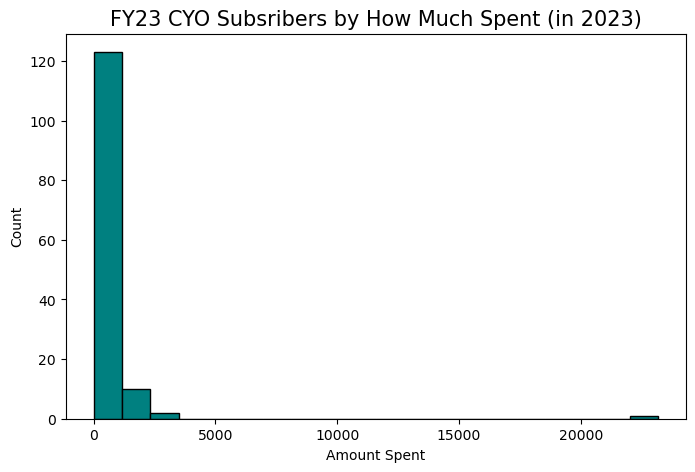

In [31]:
plt.figure(figsize=(8,5))
plt.hist(CYO23_patron['total_spent'].dropna(), bins=20, color = 'teal', edgecolor='black')
plt.title('FY23 CYO Subsribers by How Much Spent (in 2023)', fontsize = 15)
plt.xlabel('Amount Spent')
plt.ylabel('Count')
plt.show()

In [22]:
df24 = df[df['fiscal_year'] =='FY24']
upgrade24_df = df24[df24['price_code_type'].str.startswith('Fixed Upgrade Subscription', na=False)]
upgrade24_df['acct_id']

32484     180326
32523    7071539
32574    2459404
32765     180326
32780    8524938
          ...   
51665     177554
51689    7071539
51732    7599319
51746    7610063
51756    6246542
Name: acct_id, Length: 446, dtype: int64

In [23]:
upgrade24_patron = patron_2024[patron_2024['acct_id'].isin(upgrade24_df['acct_id'])]
upgrade24_patron

,acct_id,is_college_pass,total_tickets,total_seats,unique_events,total_spent,avg_ticket_price,median_ticket_price,min_ticket_price,max_ticket_price,...,median_days_before_event,min_days_before_event,max_days_before_event,ticket_type_distribution,source_distribution,age_first,gender_first,marital_status_first,education_first,zip_first
61,113853,False,6,6,6,252.0,42.000000,42.0,42.0,42.0,...,51.0,2.0,262.0,{'Subscription': 6},{'ASO Staff': 6},86.0,Female,Married,College,30326
5998,7192064,False,6,12,6,266.0,44.333333,33.0,33.0,67.0,...,233.5,84.0,301.0,{'Subscription': 6},"{'onlin': 5, 'ASO Staff': 1}",50.0,Male,Married,Graduate School,303602016


## Relationship between discount rate and demand (how successfully discount rate is working on inducing demand, which group?)

In [24]:
# Main characteristics of the people who just became Established in 2024, (age, educ, average number of attendance) 
df_establish = df24[df24['price_code_type'].str.startswith('Fixed Established Subscription', na=False)]
df_establish['age'].describe()

count    8135.000000
mean       67.209588
std        15.940083
min        20.000000
25%        56.000000
50%        70.000000
75%        78.000000
max        99.000000
Name: age, dtype: float64

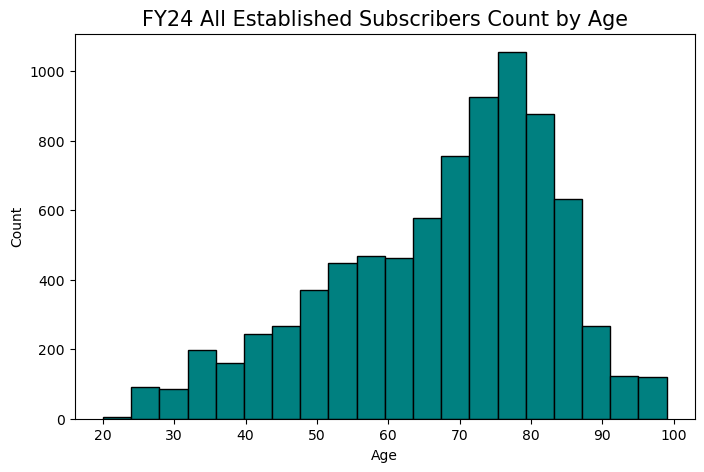

In [25]:
plt.figure(figsize=(8,5))
plt.hist(df_establish['age'].dropna(), bins=20, color = 'teal', edgecolor='black')
plt.title('FY24 All Established Subscribers Count by Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [26]:
import matplotlib.pyplot as plt

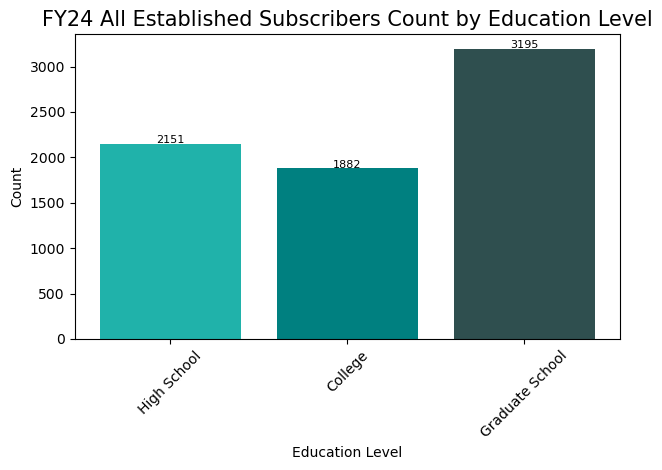

In [27]:
edu_counts = df_establish.groupby('education')['ticket_type'].count()

order = ['High School', 'College', 'Graduate School']
edu_counts = edu_counts.reindex(order)

plt.bar(edu_counts.index, edu_counts.values, color=['lightseagreen', 'teal', 'darkslategray'])
plt.title('FY24 All Established Subscribers Count by Education Level', fontsize = 15)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(edu_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=8)

plt.tight_layout()
plt.show()

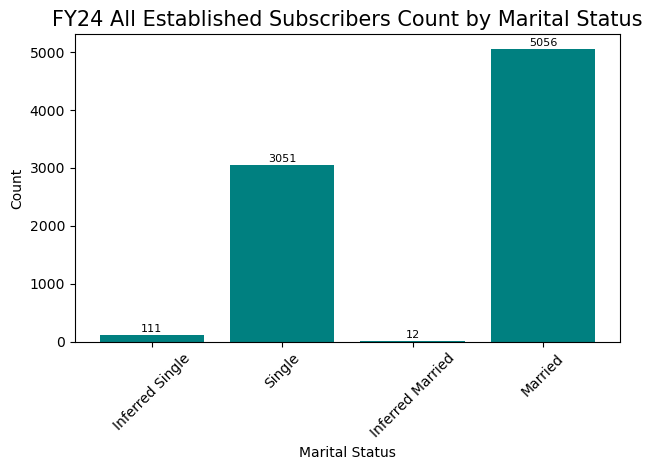

In [28]:
marital_counts = df_establish.groupby('marital_status')['ticket_type'].count()

order = ['Inferred Single', 'Single', 'Inferred Married', 'Married']
marital_counts = marital_counts.reindex(order)

plt.bar(marital_counts.index, marital_counts.values, color='teal')
plt.title('FY24 All Established Subscribers Count by Marital Status', fontsize = 15)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(marital_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()

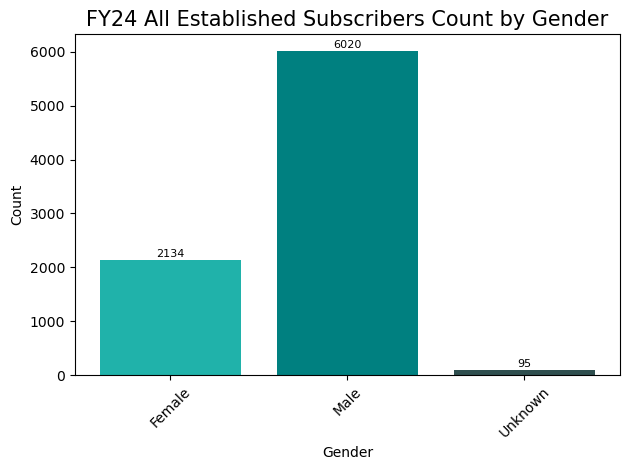

In [29]:
gender_counts = df_establish.groupby('gender')['ticket_type'].count()

plt.bar(gender_counts.index, gender_counts.values, color=['lightseagreen', 'teal', 'darkslategray'])
plt.title('FY24 All Established Subscribers Count by Gender', fontsize = 15)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()